### Ejercicio 16

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
from sklearn.model_selection import LeaveOneOut
%matplotlib inline

In [2]:
data = pd.read_csv('Cars93.csv')
features = ['MPG.city',
            'MPG.highway',
            'EngineSize',
            'Horsepower',
            'RPM',
            'Rev.per.mile',
            'Fuel.tank.capacity',
            'Passengers',
            'Length',
            'Wheelbase',
            'Width',
            'Turn.circle',
            'Weight']
X = np.array(data[features])
Y = np.array(data['Price'].values.reshape(-1,1))
lambdas = 0.5*np.logspace(-4,1,40)
loo = LeaveOneOut()
MSE_train, MSE_test, betas, betas_0 = [], [], [], [] #List to plot
#Lambda looping
for i,alpha in enumerate(lambdas):
    #Loop indicator
    if(i%5 ==0 or i==len(lambdas)-1):
        print('Iteration over lambdas: '+str(i))
    MSE_train_list, MSE_test_list = [], [] #Temp list
    #Looping over data
    for train_index, test_index in loo.split(X):
        linear_lasso = sklearn.linear_model.Lasso(alpha,normalize=True)
        linear_lasso.fit(X[train_index],Y[train_index])
        MSE_train_list.append(np.square(Y[train_index] - linear_lasso.predict(X[train_index])).mean())
        MSE_test_list.append(np.square(Y[test_index] - linear_lasso.predict(X[test_index])))
    MSE_train.append(np.array(MSE_train_list).mean())
    MSE_test.append(np.array(MSE_test_list).mean())
    #Training with all the data (for the second and third plots)
    linear_lasso = sklearn.linear_model.Lasso(alpha,normalize=True)
    linear_lasso.fit(X,Y)
    betas_0.append(linear_lasso.intercept_)
    betas.append(linear_lasso.coef_)
    

Iteration over lambdas: 0
Iteration over lambdas: 5
Iteration over lambdas: 10
Iteration over lambdas: 15
Iteration over lambdas: 20
Iteration over lambdas: 25
Iteration over lambdas: 30
Iteration over lambdas: 35
Iteration over lambdas: 39


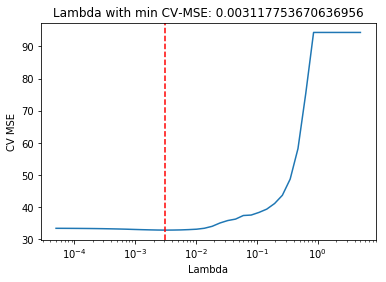

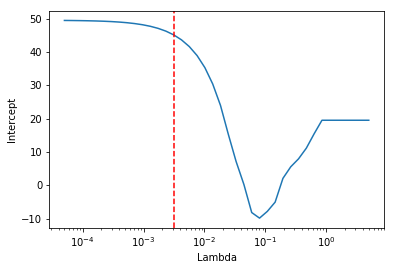

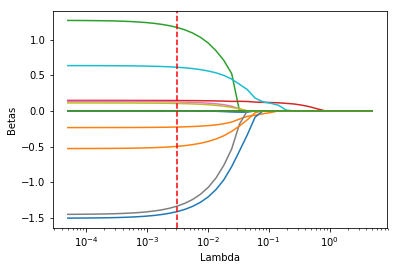

In [3]:
best_lambda = lambdas[np.argmin(MSE_test)]
plt.figure();
plt.semilogx(lambdas,MSE_test);
plt.axvline(x=best_lambda,color='r',linestyle='dashed');
plt.title('Lambda with min CV-MSE: '+str(best_lambda))
plt.ylabel('CV MSE');
plt.xlabel('Lambda');
plt.figure();
plt.semilogx(lambdas,betas_0);
plt.axvline(x=best_lambda,color='r',linestyle='dashed');
plt.ylabel('Intercept');
plt.xlabel('Lambda');
plt.figure();
plt.semilogx(lambdas,betas);
plt.axvline(x=best_lambda,color='r',linestyle='dashed');
plt.ylabel('Betas');
plt.xlabel('Lambda');

In [4]:
best_betas = list(betas[np.argmin(MSE_test)])
print('BEST BETAS: ')
main_feat = []
least_feat = []
for i in range(len(best_betas)):
    beta_i = np.round(best_betas[i],4)
    print('Beta_'+str(i+1)+'= '+str(beta_i))
    if(abs(beta_i)>=1e-2):
        main_feat.append(i)
    else:
        least_feat.append(i)
print('-------------------------')
print('Selection th')
print('-------------------------')
print('MOST IMPORTANT FEATURES: ')
print(np.array(features.copy(),dtype=str)[main_feat])
print('-------------------------')
print('LEAST IMPORTANT FEATURES: ')
print(np.array(features.copy(),dtype=str)[least_feat])

BEST BETAS: 
Beta_1= -0.0004
Beta_2= -0.2262
Beta_3= 1.1709
Beta_4= 0.1455
Beta_5= -0.0021
Beta_6= 0.0024
Beta_7= 0.1263
Beta_8= -1.3368
Beta_9= 0.1042
Beta_10= 0.6127
Beta_11= -1.4134
Beta_12= -0.4977
Beta_13= 0.0006
-------------------------
Selection th
-------------------------
MOST IMPORTANT FEATURES: 
['MPG.highway' 'EngineSize' 'Horsepower' 'Fuel.tank.capacity' 'Passengers'
 'Length' 'Wheelbase' 'Width' 'Turn.circle']
-------------------------
LEAST IMPORTANT FEATURES: 
['MPG.city' 'RPM' 'Rev.per.mile' 'Weight']
